In [11]:
!pip install --upgrade kaleido
!pip install umap
!pip install umap-learn
!pip install matplotlib-venn
!pip install -r requirements.txt
!pip install seaborn==0.12.2
!pip install nltk


ERROR: Could not find a version that satisfies the requirement umap (from versions: none)
ERROR: No matching distribution found for umap
  Using cached datasets-2.18.0-py3-none-any.whl.metadata (20 kB)
  Using cached transformers-4.39.3-py3-none-any.whl.metadata (134 kB)
  Using cached sentencepiece-0.2.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (7.7 kB)
  Using cached scipy-1.13.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata (60 kB)
  Using cached matplotlib-3.8.4-cp312-cp312-macosx_10_12_x86_64.whl.metadata (5.8 kB)
  Using cached wandb-0.17.2-py3-none-macosx_10_9_x86_64.whl.metadata (10 kB)
ERROR: Ignored the following versions that require a different python version: 1.10.0 Requires-Python >=3.8,<3.12; 1.10.0rc1 Requires-Python >=3.8,<3.12; 1.10.0rc2 Requires-Python >=3.8,<3.12; 1.10.1 Requires-Python >=3.8,<3.12; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import plotly.express as px
from matplotlib_venn import venn2
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from src.data.load_data import *
from src.utils.results_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
title_df, body_df = load_data()

Data successfully loaded from pickle files.


In [14]:
merge_df = merge_hyperlink_data(title_df,body_df)


#### Can be an introduction

### THE MODERATOR'S ARCHIVE: COLD CASE FILES
### To: New Recruits Subject: ANOMALY DETECTION 



Listen up.

If you think your job is just scrolling through cat videos and memes, you’re looking at the surface, not the code. The internet is a complex ecosystem, and sometimes, communities go dark.

We have built a model to patrol the data history. We aren't looking for noise : we are looking for the silence.

Our algorithm scans for a specific pattern: The Flatline. One day, a subreddit is buzzing with activity, the next, it hits zero. Total blackout. That is the signature of an Admin Ban, your predecessors. Just as you are dissecting the digital footprints of those who came before you, one day, I hope, a new moderator will study your work, just as you are studying theirs. 

Our detection model identifies sudden, sharp declines in the volume of outgoing hyperlinks from active subreddits. We validated these findings by cross-referencing them with external records, confirming the bans and providing crucial context regarding their removal.

Here are three "Cold Cases" our model dug up. Study them. They are perfect examples of how toxicity hides in plain sight. Look at the data plots we provided. See the sudden drop? That is the sound of a community being erased.

### 📂 CASE FILE 01: r/european
Status: BANNED (March 2016) Evidence File: Wikipedia: https://en.wikipedia.org/wiki/Controversial_Reddit_communities

The Disguise: It looked like a standard news hub for European politics.
The Reality: A sanctuary for far-right white nationalism. It was created specifically because r/europe started enforcing rules against hate speech.
The Forensic Evidence: Behind the "news" facade, it was a hub for antisemitism and Islamophobia. An internal survey showed 17% of its users openly identified as Nazis.
The Flatline: Admins pulled the plug and quarantined the sub after a user bragged about assaulting a refugee. The graph hits zero, and the community scatters.



--- Génération de la planche pour 1 subreddits ---



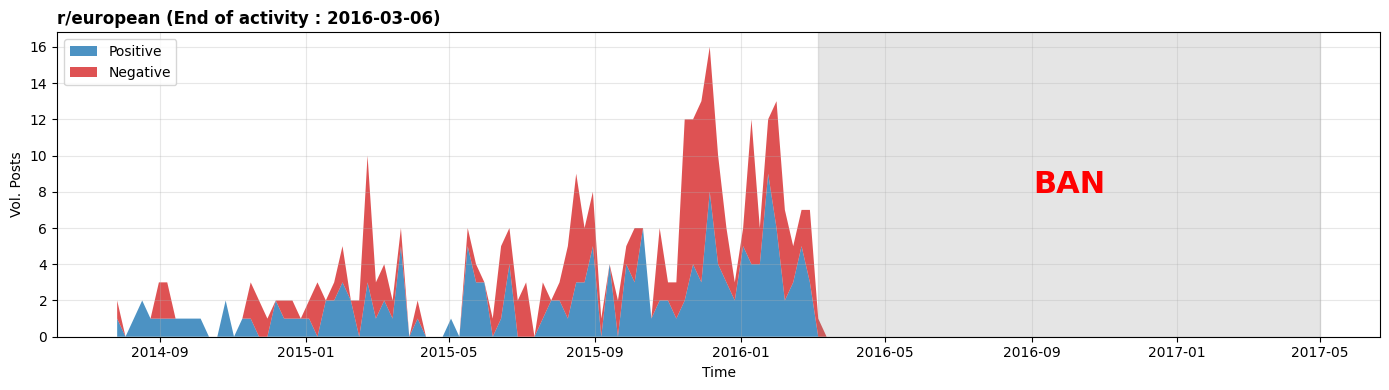

In [15]:
from my_function import visualiser_ban_multi_plots

visualiser_ban_multi_plots(merge_df, subreddit_list=['european'])

### 📂 CASE FILE 02: r/leftwithsharpedge
Status: BANNED (November 2016) Evidence File: https://www.reddit.com/r/SubredditDrama/comments/5i5zv9/rleftwithsharpedge_has_been_banned/

The Disguise: An "edgy" alternative to the moderate r/leftwithoutedge.
The Reality: The "edge" was literal. It became a haven for radical anarchists who believed the only solution was violence.
The Forensic Evidence: Toxicity isn't partisan. This sub was shut down for inciting violence.


--- Génération de la planche pour 1 subreddits ---



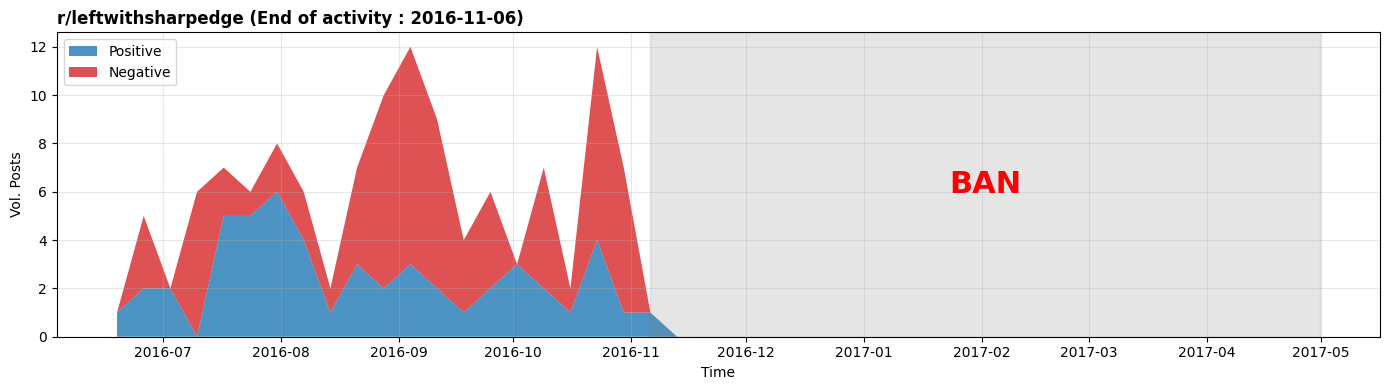

In [16]:
from my_function import visualiser_ban_multi_plots

visualiser_ban_multi_plots(merge_df, subreddit_list=['leftwithsharpedge'])

### 📂 CASE FILE 03: r/publichealthwatch
Status: BANNED (October 2016) Evidence File: https://www.reddit.com/r/OutOfTheLoop/comments/5bu60o/what_was_rpublichealthwatch_and_what_was_the/

The Disguise: A boring, bureaucratic name. Sounds like a government agency or a medical journal, right?
The Reality: The Master of Camouflage. Despite the name, it was a hate group targeting the LGBT community and minority.
The Forensic Evidence: They didn't use slurs openly, they used pseudo-science to argue that alternative lifestyles were a "public health" problem.
The Lesson: This is the most dangerous type of content. It mimics authority to spread hate.

--- Génération de la planche pour 1 subreddits ---



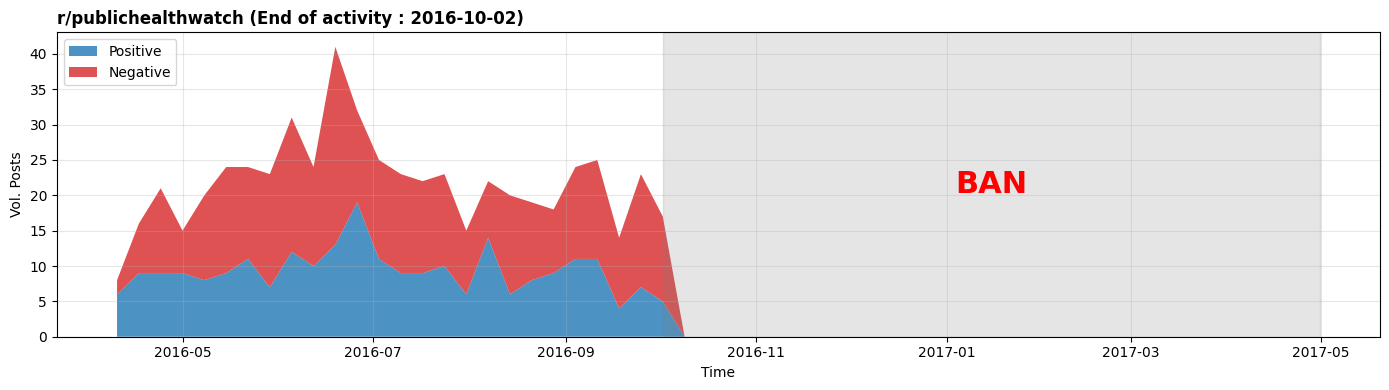

In [17]:
from my_function import visualiser_ban_multi_plots

visualiser_ban_multi_plots(merge_df, subreddit_list=['publichealthwatch'])

Now, I hope you understand the gravity of your mission: to put an end to these online behaviors.

Remember the most important lesson from these examples:

Never trust the name of a subreddit.

r/publichealthwatch sounded safe. r/european sounded official. Your enemies know how to hide in the crowd. They use sarcasm, "jokes", and boring titles to mask their intent.

Lets Get to work ! 

_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## Part 1: Know Your Enemy (Topological Analysis)

#### The Mod's Lesson: "Rule #1: Not all enemies are created equal. Identify the Bullies."
The rookie moderator thinks their job is simple: ban the bad words and ban the users who spam them. But if you are reading this manual, it is because you want to be a Great Moderator.
In the galaxy of Reddit, aggression isn't random. It follows patterns. To survive, you must first understand that volume does not equal danger, and that your enemies come in different shapes and sizes. We have mapped the battlefield so you don't have to fight blind.


### 1. The False Friend Paradox: Volume vs. Intent


The Intel: The first mistake a moderator makes is looking at the "Top Referrers" list and banning the subreddit that sends the most negative links. Let’s look at the data.

The Analysis: Look at r/bestof (second from the top). It sent 3,464 negative links. A rookie would blacklist them immediately. But look at the blue bar to the right: they also sent nearly 18,000 positive links. With a toxicity ratio of only 16.4%, r/bestof isn't an enemy, it's a bustling public square.

Now, compare that to r/drama or r/srssucks.

r/drama has a smaller total volume, but a 39.7% toxicity ratio.
r/srssucks is at 35.4%.

Actionable Advice:
Don't ban by volume. Ban by Ratio. A subreddit linking to you 100 times with 90 smiles is a friend. A subreddit linking to you 10 times with 10 knives is an assassin. Ignore the noise of r/bestof, focus your defenses on the concentrated toxicity of r/drama.


In [18]:
from my_function import plot_most_wanted_plotly

plot_most_wanted_plotly(merge_df)

### 2. The Tactical Map: Snipers vs. War Zones

The Intel: We plotted every active subreddit on a map based on how many attacks they launch (X-axis) versus how many they receive (Y-axis). This reveals the structural role they play in the conflict network.

The Analysis: The map reveals three distinct zones:

The Snipers (Bottom Right): Look at the red dots in the bottom right corner. These communities launch thousands of attacks but are almost never attacked back. They are the "Bullies" of the network. They sit in their fortress, firing shots at others.

The Punching Bags (Top Left): These blue dots are the victims. They receive massive hate but rarely retaliate.

The War Zones (Top Right and Diagonal): This is the chaos of r/politics or r/The_Donald (subreddit about Donald Trump). Everyone is fighting everyone.

Actionable Advice:

Identify the Snipers. You cannot negotiate with a Sniper. They are not interested in a two-way war (War Zone), they want a one-way raid. If you see traffic coming from the Sniper Zone, trigger your lockdown protocols immediately.


In [19]:
from my_function import plot_tactical_map_interactive

plot_tactical_map_interactive(merge_df, min_interactions=10)

Construction de la Tactical Map Interactive...


### 3. Modus Operandi: Temporal Patterns of Conflict

The Intel: Identifying the enemy is half the battle, you must understand their rhythm. By visualizing attack patterns over a 3-year timeline, we uncovered distinct behavioral profiles.

The Analysis:
The Serial Killers (Bottom Rows): Observe the solid, unbroken lines of red dots at the bottom (e.g., r/subredditdrama). These entities attack every single month without fail. They represent the chronic conditions of the network—relentless and persistent.

The Opportunists (Top Rows): Contrast this with the top rows (e.g., r/peoplewhosayheck). Their timelines are largely empty, punctured only by one or two massive, exploding bubbles. These are "Sleeper Cells"—dormant for years, only to wake up for a single, devastating raid before vanishing again.

The Emerging Threats (Middle Rows): Crucially, look at the middle section. Some communities appear out of the void or awaken from long silences to suddenly adopt a chronic pattern of negativity (r/The_Donald). These are "Radicalized Newcomers", subreddits that transition from non-existence (or dormancy) to becoming full-blown Serial Killers.

Actionable Advice: Automate the Chronic, Alert on the Acute.

For Serial Killers: Use AutoMod. Set permanent filters for their links. Their behavior is predictable, so your defense should be static.

For Opportunists: You need an Anomaly Detection System. Since you cannot predict them, you need a "Panic Button." If traffic spikes from an unknown sub, man the battle stations for a short, intense wave.

For Emerging Threats: Monitor slope changes. If a previously quiet sub hits you twice in two months, upgrade them immediately to your "Serial Killer" blocklist.

In [20]:
from my_function import plot_constancy_rainplot

plot_constancy_rainplot(merge_df, min_attacks=50, top_n=40)

Génération avec 70% d'Opportunistes...


### 4. The Moving Target: Evolution of Victims

The Intel: Finally, do not get comfortable. The target on your back moves. Our historical analysis shows that the victims of Reddit changes based on internet culture trends. We analyzed the Top 10 victims semester by semester from 2014 to 2017.

The Analysis:

The Eternal Victim (r/AskReddit): There is one universal constant. Look at the top bar of every single chart. r/AskReddit retains the crown of Victim #1 throughout the entire dataset. As the "public square" of the internet, it is under a permanent state of siege.

The "Great Replacement" (2016 Shift): The nature of war changed. In 2014, the victims were lighthearted content hubs like r/adviceanimals or r/funny. By 2016, the landscape shifted to ideological warfare. r/The_Donald appeared out of nowhere to become the #2 most attacked sub, flanked by r/politics and r/worldnews.

Actionable Advice:

Update your watch lists and know your risk profile. A victim’s list from 2014 is useless in 2017.

If you run a General Sub: Prepare for a war of attrition. The volume will never drop.

If you run a Niche Sub (Gaming, Politics): Watch the news. You can go from "Invisible" to "Target #2" in less than 6 months. When the culture shifts (e.g., an election), you become the new frontline. Be ready to pivot your defense strategies instantly.

In [21]:
from my_function import plot_victim_semesters_slider


# --- Appel ---
plot_victim_semesters_slider(merge_df, top_n=10)

Génération du Plot Interactif Stabilisé...


---

# data processing 

In [22]:
# loading embeddings
usr_df, sub_df = load_embeddings()


# Applaying the thresehold of 10 interaction 
# We admite that subreddits which have less that 10 hyperlinks ( positif + negatif ) are not significant for our study  
Tmerge_df, stats = filter_subreddits_by_interaction_threshold(
    merge_df,
    threshold=10, verbose=True
)

# keeping only subreddits present in merged_df

# 1. Identify all unique subreddits in the interaction graph
unique_subreddits = set(Tmerge_df['SOURCE_SUBREDDIT']) | set(Tmerge_df['TARGET_SUBREDDIT'])

# 2. Filter the embeddings dataframe
sub_merged_df = sub_df[sub_df['SUBREDDIT'].isin(unique_subreddits)].copy()

print(f"sub_df shape: {sub_df.shape}")
print(f"Filtered sub_merged_df shape: {sub_merged_df.shape}")

Embeddings successfully loaded from pickle files.
Applied threshold: 10 interactions
   Total subreddits before: 67,180
   → Kept: 12,785 (19.03%)
   → Removed: 54,395 (80.97%)
   Rows before: 858,488, after: 737,593
sub_df shape: (51278, 302)
Filtered sub_merged_df shape: (11349, 302)


---

## Part 2: The Semantic Radar (Tribal Warfare Analysis)

The Mod's Lesson: "Rule #2: The danger is closer than you think. We don't fight strangers, we fight our neighbors. The bloodiest wars are civil wars."


### 1. Neighborly Friction: The Law of Proximity

**The Intel:**
In Part 1, you learned how to spot a "Sniper." Now you need to know where they are aiming.
Before identifying the specific factions involved in Reddit’s conflicts, a moderator must understand the physical range of engagement. Where does the fire actually come from? 
A common rookie mistake is assuming that "hate is random", that trolls just spray fire in every direction. The data proves this wrong. 

Look at this chart. We plotted the **Volume of Hostility** against **Semantic Distance** (where 0 is your twin and 1 is an alien).

**The Analysis:**
You are looking at the *Ballistics of Reddit Conflict*.

* **The Dead Zone (Distance 0.6 – 1.0):** The curve is flat. There is almost zero "long-range artillery."
    * *Why?* A community dedicated to *Knitting* is semantically invisible to *r/DayZ*. They exist in different universes with no shared vocabulary, and therefore, **no reason to fight**.
    * *The Reality:* If you run a niche sub far from the mainstream, you are naturally camouflaged.

* **The Inner Circle (Distance < 0.1):** Low conflict volume.
    * *Why?* These subreddits are so mathematically similar that they are effectively the same population (e.g., *r/Science* vs. *r/Physics*). They act as allies or satellite states, not enemies.

* **The Red Zone (Distance 0.1 – 0.5):** **This is where the bodies are buried.**
    * *Why?* This is the "Uncanny Valley" of community interaction. These communities are similar enough to care about the same topics (e.g., *Console Gaming*, *US Politics*), but different enough to disagree on identity, rules, or tribe loyalty.
    * *The Dynamic:* The "Snipers" we identified in Part 1 do not hunt strangers. They hunt their neighbors. They aren't fighting for resources; they are fighting for **legitimacy** over a shared domain.

**Actionable Advice:**
Stop scanning the horizon for an invasion force. The data shows that **conflict is driven by the Narcissism of Small Differences**.
* **Assess your Perimeter:** Who sits in your 0.1–0.5 range? (We will identify them in the next section).
* **Rule of Engagement:** If a subreddit covers your topic but has slightly different rules (e.g., "No Memes" vs. "Memes Allowed"), **that** is your primary threat. Prepare your defenses there.

In [23]:
from my_function import plot_semantic_distance_line_negative

plot_semantic_distance_line_negative(merge_df, sub_merged_df, nbins=60)

---

# Following is for understanding : --> Don t need to put on the web site it is just for the final jupyter

In [24]:
from my_function import evaluate_kmeans_clusters


# We try to find the best K for KMeans clustering ( between 15 and 20)

evaluate_kmeans_clusters(sub_merged_df, start_k=2, end_k=30)

Preparing data...
Data shape: (11349, 300)
Calculating Inertia and Silhouette scores for K=2 to 30...


KeyboardInterrupt: 

# K-mean++ clustering 

In [ ]:

# We try DBScan clustering after some projection (umap and PCA) but the noise was to big so we choose Kmean
# we choose K=19 from the previous analysis (we want to have more granularity on the communities and there is a spike for k=19)

# Print proportions
# Even if cluster 1 represent more than 50% of the subreddits, it's activity is in the average 

from my_function import run_kmeans_and_analyze

sub_merged_df = run_kmeans_and_analyze(sub_merged_df, k=19)

--- Running K-Means with K=19 ---
Proportion of subreddits per cluster (%):
---------------------------------------------
Cluster 00:   1.38%  (157 subreddits)
Cluster 01:  57.45%  (6520 subreddits)
Cluster 02:   0.52%  (59 subreddits)
Cluster 03:   2.07%  (235 subreddits)
Cluster 04:   4.34%  (492 subreddits)
Cluster 05:   7.34%  (833 subreddits)
Cluster 06:   1.69%  (192 subreddits)
Cluster 07:   3.33%  (378 subreddits)
Cluster 08:   9.82%  (1115 subreddits)
Cluster 09:   2.57%  (292 subreddits)
Cluster 10:   0.56%  (63 subreddits)
Cluster 11:   1.40%  (159 subreddits)
Cluster 12:   1.18%  (134 subreddits)
Cluster 13:   0.18%  (20 subreddits)
Cluster 14:   0.98%  (111 subreddits)
Cluster 15:   0.76%  (86 subreddits)
Cluster 16:   1.13%  (128 subreddits)
Cluster 17:   1.55%  (176 subreddits)
Cluster 18:   1.75%  (199 subreddits)
---------------------------------------------
 Note: Cluster 1 is very large (57.45%).
   Even if it contains >50% of subs, check if its total *activity* is b

In [ ]:
from my_function import analyze_cluster_contents


sub_merged_df = analyze_cluster_contents(sub_merged_df, merge_df)

--- Calculating Activity Metrics ---

=== TOP 20 MOST ACTIVE SUBREDDITS PER CLUSTER ===
Cluster 0: news, bitcoin, science, technology, india, books, dataisbeautiful, programming, documentaries, space, linux, philosophy, history, btc, entrepreneur, ethereum, cryptocurrency, sports, getmotivated, italy
Cluster 1: notcirclejerk, evenwithcontext, botsrights, retiredgif, circlejerkcopypasta, worstof, justunsubbed, episodehub, jesuschristreddit, karmacourt, shitwehraboossay, excgarated, defaultgems, trendingsubreddits, beetlejuicing, negativewithgold, dailydot, upvotedbecausegirl, soposts, bestoftldr
Cluster 2: newsokur, gonewildaudio, dirtypenpals, spam, newsokunomoral, gonewild, politic, podemos, r4r, fireteams, dirtyr4r, ageplaypenpals, hcteams, randomactsofblowjob, giveaways, kohi, randomactsofmuffdive, rocketleagueexchange, dirtykikpals, sexsells
Cluster 3: circlebroke2, movies, television, music, squaredcircle, starwars, moviescirclejerk, writing, gameofthrones, fantasy, thenetherlands

In [ ]:
# Thanks to the previous observations we give a tribe name for each clusters


tribe_mapping = {
    0: "Knowledge & World",
    1: "Meta-Humor & Bot Watch",
    2: "NSFW (Social & Requests)",
    3: "Media Fandoms",
    4: "Tech & Lifestyle",
    5: "Strategy & Mods",
    6: "General Discussion",
    7: "Visual Viral Content",
    8: "Critique & Sociology",
    9: "Internet Culture & Sports Streams",
    10: "Music & Global Sports",
    11: "American Sports",
    12: "NSFW (Visual - Porn)",
    13: "CS:GO & Item Trading",
    14: "Esports & MMOs",
    15: "Fandoms & Indie Games",
    16: "Personal Support & Advice",
    17: "Core Gaming & Hardware",
    18: "Politics & Controversy"
}
# 2. Apply the mapping to create the new column
sub_merged_df['tribeName'] = sub_merged_df['cluster'].map(tribe_mapping)


In [ ]:
from my_function import create_tribe_intelligence_df

# Creation of a tribu dataframe for next studies
# 1. Define Tribe Mapping (as determined in previous steps)
# 2. Calculate Cluster Stats (Size & Activity)
tribe_df = create_tribe_intelligence_df(sub_merged_df, Tmerge_df, tribe_mapping)
tribe_df.head()

,cluster_number,cluster_name,cluster_size,cluster_activity,top_3_attackers_num,top_3_victims_num,top_3_attackers_name,top_3_victims_name
0,0,Knowledge & World,157,72964,"[18, 6, 8]","[0, 18, 6]","[Politics & Controversy, General Discussion, C...","[Knowledge & World, Politics & Controversy, Ge..."
1,1,Meta-Humor & Bot Watch,6520,276796,"[1, 18, 6]","[6, 7, 18]","[Meta-Humor & Bot Watch, Politics & Controvers...","[General Discussion, Visual Viral Content, Pol..."
2,2,NSFW (Social & Requests),59,10580,"[1, 18, 8]","[1, 18, 2]","[Meta-Humor & Bot Watch, Politics & Controvers...","[Meta-Humor & Bot Watch, Politics & Controvers..."
3,3,Media Fandoms,235,51004,"[6, 1, 3]","[6, 7, 18]","[General Discussion, Meta-Humor & Bot Watch, M...","[General Discussion, Visual Viral Content, Pol..."
4,4,Tech & Lifestyle,492,96786,"[6, 1, 18]","[4, 6, 7]","[General Discussion, Meta-Humor & Bot Watch, P...","[Tech & Lifestyle, General Discussion, Visual ..."


# From now you can put on the website

---

### The Core Concept: Why "Tribes" and not "Topics"?

**The Intel:**
You know *where* the danger is (the 0.1–0.5 zone). Now you need to know *who* lives there.
Rookie moderators categorize subreddits by "Topics" (e.g., Gaming, Sports, News). **This is a mistake.** In a war, labels don't matter; alliances do.

**The Analysis:**
We didn't group subreddits based on what they *say* they are. We grouped them based on **User Navigation Embeddings**.
* **The Data Reality:** The algorithm tracked millions of users moving from one subreddit to another. It followed the footsteps, not the signposts.
* **The Implication:** If two subreddits are close in this space, it means the *same people* live there.
* **The Result:** We identified **19 Dominant Tribes** ($K=19$). These aren't library categories; they are living, breathing human communities fighting for the same semantic territory.

**Actionable Advice:**
Stop looking at the sidebar description. Look at the crowd.
* If you mod r/PS5, your "Tribe" isn't just "Video Games"—it includes specific tech subreddits and excludes others.
* **Your Survival Strategy:** You are not an island. You are part of one of these 19 Tribes. Acknowledging your allegiance is the first step to understanding your enemies.

### 2. The Tribal Warfare Matrix (The Macro View)

**The Intel:**
We know the Tribes. Now we need to distinguish between **Noise** (Volume) and **Malice** (Intent).
To do this, we present the data in two views side-by-side:

1.  **The Obsession Map (Left):** A pure heatmap of **Fixation**. It ignores size and focuses on *focus*. (Question: *"Of all the attacks Tribe A launched, what % went to Tribe B?"*)
2.  **The Warfare Matrix (Right):** A bubble chart adding **Volume**. (Question: *"How many actual shots were fired?"*)



**The Analysis:**
By comparing the two maps, specific "War Crimes" become visible:

1.  **The Civil Wars (High Internal Fixation):**
    * *The Insight:* **We fight our own.** Most toxicity isn't an invasion; it's an internal purge.
    * *The Evidence:* Look at **American Sports**. The diagonal square is deep red. This reveals that Sports fans aren't fighting Gamers or Political junkies. They are almost exclusively fighting *other* Sports fans. It is a closed loop of tribal violence.

2.  **The Pariah Tribes (The Punching Bags):**
    * *The Insight:* Some tribes act as "Universal Enemies." They unite the rest of Reddit in common hatred.
    * *The Evidence:* Look at the column for **General Discussion**. It appears as a vertical stripe of bubbles. This means *everyone* attacks them. Whether you are from the Tech Tribe or the Political Tribe, "General Discussion" is your common enemy.

3.  **The Blood Feuds (The Snipers):**
    * *The Insight:* Small dark-red squares *off* the diagonal reveal targeted vendettas.
    * *The Evidence:* Even if the bubble size is small (low volume), a high Rivalry Score indicates a "structural obsession." These tribes have stopped fighting a general war and are fixated on destroying a specific neighbor.

**Actionable Advice:**
* **Don't Confuse Noise with Hate:** A large pink bubble is a chaotic brawl. A small dark-red square is a sniper. Fear the sniper.
* **Check the Diagonal First:** If you mod a Sports sub, your threat is internal. Monitor your own "Meta" threads closer than you monitor *r/All*.
* **Don't Be a Pariah:** If you see your Tribe forming a "Vertical Stripe" like *General Discussion*, you are in a defensive war against the entire platform. Lock the gates.

In [ ]:
from my_function import plot_dual_warfare_matrix

plot_dual_warfare_matrix(Tmerge_df, sub_merged_df, tribe_mapping, min_interactions=10)

### 4. The Strategic Radar — Your Early Warning System

**The Intel:**
The Warfare Matrix (above) gives you the global weather report. But a moderator doesn't need to know if it's raining *everywhere*; you need to know if a storm is hitting *your* house.
This is your **Tactical Radar**. It answers the single most important question for survival: *"When the attack comes, what flag will it fly?"*

**The Analysis:**
Select your Tribe from the dropdown. The radar generates a unique **Threat Signature** based on two defensive layers:

* **<span style="color:purple">The Purple Zone (Incoming Attacks):</span>**
    * *What it tells you:* Who is besieging you?
    * *The Shape of Danger:*
        * *A Single Spike:* You have a **Nemesis**. (e.g., *r/Science* is specifically targeted by *The Conspiracist Tribe*). You can predict exactly where the brigading will come from.
        * *A Full Circle:* You are a **Pariah**. (e.g., *r/Politics*). You are being attacked from all sides. There is no specific enemy; the world is the enemy.

* **<span style="color:red">The Red Zone (Outgoing Aggression):</span>**
    * *What it tells you:* Who are your users raiding?
    * *The Shape of Aggression:*
        * *A Spike:* Your users have a specific vendetta. They are "hunting" a neighbor.
        * *A Full Circle:* Your community is indiscriminately toxic. You are managing a "Flash Mob" that attacks anything that moves.

**Actionable Advice:**
* **Check the Radar Daily:** Before you ban a user for "trolling," check their history against your Radar. If they post in a Tribe that has a massive Purple Spike against you, they aren't a lost tourist, they are an enemy combatant.
* **Silence the Red Spikes:** If you see your community forming a Red Spike against a specific neighbor, implement an automod filter for links to that subreddit. Stop the raid before the admins step in.


In [ ]:
from my_function import plot_interactive_tribe_radar

plot_interactive_tribe_radar(Tmerge_df, sub_merged_df, tribe_mapping, threshold=50)

### 5. The Aggression Autopsy: Community Conflict Profiling

**The Intel:**
The Radar (Section 4) is your Early Warning System—it beeps when a Tribe gets too close.
But once the alarm goes off, you need a **Microscope**. You need to analyze the specific logistics of the battle for a single subreddit.


**The Analysis:**
This tool visualizes the *flow* of hate through a specific community.

* **The Supply Lines (<span style="color:purple">Left / Purple</span>):**
    * *Question:* "Who is exporting toxicity into my borders?"
    * *Tactical Value:* These are your invaders. If you see a massive purple stream from *The Gamer Tribe*, you know exactly which keywords to filter.

* **The Retaliation (<span style="color:red">Right / Red</span>):**
    * *Question:* "Where are my users attacking?"
    * *Tactical Value:* This is your liability. If you see a massive red stream pointing at a harmless neighbor, your community is brigading. **Shut it down** before the Admins shut *you* down.

**Forensic Case Files:**
We analyzed three distinct profiles to show you the "Shapes of War":

1.  **The Besieged Fortress (e.g., *r/nfl*)**
    * *The Signature:* Massive Purple (Incoming) vs. Tiny Red (Outgoing).
    * *The Data:* *r/nfl* received **315** hostile links but sent only **36**.
    * *The Civil War Proof:* Look closely at the Purple supply lines. The largest attacker is **"American Sports"**, its own Tribe. *r/nfl* isn't fighting strangers. It is under siege from its own neighbors. It is a disciplined fortress holding the line.

2.  **The Export Hub (e.g., *r/drama*)**
    * *The Signature:* Thin Purple (Incoming) vs. Massive Red (Outgoing).
    * *The Data:* *r/drama* is the inverse. It received 252 attacks but launched a staggering **2,658** outgoing attacks.
    * *The Diagnosis:* This is a **Bully**. It functions not as a community, but as a raid staging ground. If your Sankey looks like this, you are the villain of the story.

3.  **The Thunderdome (e.g., *r/the_donald*)**
    * *The Signature:* Heavy Purple AND Heavy Red.
    * *The Data:* A state of Total War. It absorbed **663** incoming attacks while simultaneously launching **504** counter-attacks.
    * *The Diagnosis:* This is a **Combatant**. Unlike the "Fortress" (which ignores attacks) or the "Bully" (which isn't attacked back), the Thunderdome trades blows. Look at the symmetry: the top source of hate (*Politics*) is also the top target of hate. This is Mutually Assured Destruction.

**Actionable Advice:**
* **Run the Diagnostic:**
    * **Heavy Left / Empty Right:** You are a **Martyr**. Document the flows and report brigading to Admins.
    * **Empty Left / Heavy Right:** You are a **Bully**. Your users are weaponizing your sub. Implement strict "No Participation" (NP) rules immediately.
    * **Heavy Both:** You are a **Thunderdome**. You exist in a state of perpetual conflict. Your only survival strategy is to keep your moderation queue moving faster than the incoming fire.

In [ ]:

from my_function import generate_interactive_ballistics_report

sub_targets = [
    'nfl', 'drama', 'the_donald', 'politics', 'soccer', 
    'bitcoin', 'science', 'gaming', 'gunners', 'leagueoflegends', 'starwars', 'newsokur', 
    'globaloffensive', 'legaladvice', 'argentina','conspiracy' 'ps4'
]

generate_interactive_ballistics_report(Tmerge_df, sub_merged_df, tribe_mapping, sub_targets)

# WE SHOULD DO A CONLUSION ON THE PART

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# piece of part 4 - The Language of War (Linguistic Analysis)

In this dataset, hyperlinks are already labeled as positive or negative. However, this is a luxury you will not have in real operations.

On the battlefield of Reddit, no one tells you in advance which messages are harmful.

That is why we trained a first machine learning model to assist future moderators in detecting negative content automatically. The model is trained on this crownd-source labeled dataset and serves as an early-warning system rather than a final judge.

Because some features available in the original dataset rely on expensive proprietary licenses, we deliberately restricted ourselves to fully computable features extracted using open-source libraries only. This choice ensures that our approach remains reproducible, transparent, and deployable at scale.

For this task, we used a Random Forest classifier, chosen for its robustness, interpretability, and ability to handle heterogeneous features without heavy preprocessing.

This model does not replace human moderation, it gives you better intelligence before you engage.

In [ ]:
from detection_sentiment import train_model

model = train_model(merge_df, target_col='LINK_SENTIMENT')

🔄 Préparation des données...
✂️ Split Train/Test...
🌲 Entraînement du Random Forest...
✅ Modèle entraîné avec succès ! Précision sur le set de test : 91.70%


### Try it --> Need to expose it with API

In [ ]:
from detection_sentiment import test_sentence

threshold=0.4


test_sentence(model, "This is so strange and shitty", threshold)


📝 Phrase : "This is so strange and shitty"
⚙️ Seuil : 0.4
🔴 RÉSULTAT : TOXIQUE / NEGATIF (Probabilité : 58.0%)
------------------------------


### Human Intuition vs. Machine Blindness

1. The Ground Truth: Human Intelligence : Crucially, our dataset labels saying if crosslinks are negative or positive are crowdsourced, meaning they were verified by humans, not machines. Humans possess a superpower that simple algorithms lack: Context. A human reader instinctively detects the sarcasm in a phrase like 'Good job breaking everything,' identifying it immediately as an attack.

2. The Tool: VADER : In contrast, we tested VADER, a rule-based model, also used in the dataset's features. It relies on a dictionary of words:
Compound Score (X-Axis): The algorithm's final verdict (Left=Bad, Right=Good).
Positive Word Intensity (Y-Axis): The density of 'nice' words used (e.g., 'best', 'genius', 'love').

3. The Trap: Sarcasm Camouflage : The plot reveals the failure of the machine. The red dots on the far right are False Positives. These are attacks that humans correctly flagged as toxic. However, because the attackers used 'high-intensity positive words' (high Y-value) to mask their aggression, VADER was fooled into rating them as purely positive (high X-value). This is the Sarcasm Trap: toxicity disguised as praise.

In [27]:
from my_function import visualiser_sarcasme_only_red

# --- EXEMPLE D'UTILISATION ---
visualiser_sarcasme_only_red(merge_df, sample_size=5000)

ℹ️ Affichage d'un échantillon aléatoire de 5000 liens négatifs.


### Quantifying the Threat: The Numbers Behind the Dots
Now that the "Sarcasm vs. Honesty" plot has visually demonstrated how VADER can be fooled by positive words, let's move from visual intuition to operational reality. The red dots on the graph aren't just outliers; they represent a significant breach in automated defenses.

We analyzed a total of 82,210 negative hyperlinks (confirmed attacks). Here is how the algorithm categorized them:

🟢 69.55% are "Honest Attacks" (57,179 links): These are the "easy catches." The attackers used explicitly negative language ("stupid", "worst", "hate"). VADER correctly identified them as negative. Standard AutoMod filters will work perfectly here.

🔴 12.73% are "Sarcastic Camouflage" (10,463 links): This is the critical failure rate. In 1 out of every 8 attacks, the aggressor used positive language to mask their hostility ("You are a genius", "Great logic"). VADER rated these as "Positive," meaning an AI-only moderation system would let 10,000+ attacks slip through.

⚪ 17.72% are the "Grey Zone" (14,568 links): These are ambiguous cases where the sentiment score was neutral or weak, yet the intent was hostile. This often corresponds to passive-aggressiveness or context-dependent attacks that require human judgment.

## The Moderator's Takeaway

 If you rely solely on AI bots to protect your community, you are mechanically missing ~30% of the threats (Sarcasm + Grey Zone). Automation is excellent for handling the sheer volume of "Honest Attacks" (the ~70%), but human moderators are mandatory to intercept the sophisticated 12.7% who know how to game the system.

We have established that sarcasm represents a significant challenge for automated moderation, accounting for roughly 12% of toxic content globally.

However, applying the same level of scrutiny to every community is inefficient. Sarcasm usage is not evenly distributed, it is highly dependent on the specific culture of each subreddit.

### Identifying High-Risk Environments

While the global baseline sits at 12%, specific communities significantly exceed this average. The following visualization breaks down sarcasm levels by subreddit, identifying the high-priority targets where automated tools are least effective.

In [28]:
from my_function import plot_top_sarcastic_subreddits

plot_top_sarcastic_subreddits(merge_df, min_attacks=50, top_n = 20)

Identification des 'Rois du Sarcasme'...


---


# NEW PART WE NEED TO ADD, "WHEN AND WHERE ?"

Now that you have an overview of these attacks --> Change the intro depending on where you put these information 

### Workload Distribution & Critical Windows

To help you organize your operational calendar, we analyzed the timestamps of all confirmed attacks. The data reveals a crucial insight for resource allocation: toxicity is a constant variable. There is no "day off" on the internet.

As shown in the visualization, the volume of attacks never truly stops, but it does follow a specific pattern:

The Thursday Peak: Thursday is statistically the most intense day for hostile interactions. This is your "High Alert" window where thread activity and conflict reach their maximum density.

The Weekend Dip: While Saturday and Sunday show a slight decrease in total volume, do not mistake this for a ceasefire. The drop is marginal.

### The Moderator's Takeaway

Resource Allocation Strategy:

Thursday: Requires maximum coverage. Do not schedule maintenance or non-essential tasks on this day.

The Weekend: While the volume is slightly lower, reaction time often drops because fewer moderators are online. Do not lower your guard. A lower frequency of attacks does not mean a lower severity of attacks.

In [29]:
from my_function import plot_temporal_toxicity_heatmap

plot_temporal_toxicity_heatmap(merge_df)

Construction de la Heatmap Temporelle...


Now that you know when you have to be connected, we have to tell you WHERE you have to be connected.

We try to look where most of the cross linkcs emerge from, the body or the title of subreddits.

The distinction is not just technical, it is tactical.

The Body (The Bunker): Toxicity inside a post is "contained." Only users who click and read the thread are exposed. It requires active engagement to be seen.

The Title (The Billboard): A toxic title is visible to everyone scrolling their feed, whether they click or not. It is a broadcast weapon. Attacks located in the Title are rarely impulsive; they demonstrate a deliberate intent to mobilize.
It acts as a recruitment poster for brigading. It sets the narrative before the discussion even begins. While body text might be a rant, a toxic title is a call to arms.




Unfortunately, your adversaries aren't just toxic, they are tactical. They know exactly how to be effective.

Not only is the density of negativity higher in Titles than in Body content, but the volume is where the reality becomes truly dramatic. Nearly 75% of all negative hyperlinks are located in the Titles.

They aren't hiding in the Bunker, they are weaponizing the Billboard to ensure maximum visibility. In short: you have a lot of work to do.






In [41]:
from my_function import plot_simple_vector
from my_function import plot_attack_origin_comparison


plot_simple_vector(body_df, "BODY")

plot_simple_vector(title_df, "TITLE")

plot_attack_origin_comparison(title_df, body_df)
